In [1]:
import matplotlib.pyplot as plt
import json
import numpy as np 
import glob
import os 
import re
from copy import deepcopy
import matplotlib
from matplotlib.lines import Line2D
from matplotlib.backends.backend_pdf import PdfPages
from cycler import cycler

In [2]:
def format_json(json, formatter):
    for key, val in json.items():
        if key in formatter.keys():
            json[key] = formatter[key](val)
    return json

In [3]:
def get_frame_id(path):
    path = os.path.basename(path)
    return re.findall(r'[0-9][0-9][0-9][0-9][0-9]',path)[0]

In [13]:
def get_valid_vrel(path, valid_set):
    paths = sorted(list(glob.glob(path)))
    #print(paths)
    vrel_list = []
    for path in paths:
        with open(path,'r') as json_file:
            frame = json.load(json_file)
            if get_frame_id(frame['rhop-path']) in valid_set:
                formatter = {
                    'binEdges':np.array,
                    'binCenters':np.array,
                    'velc_sum': np.array,
                    'velc_rad_sum': np.array
                }
                format_json(frame,formatter)
                vrel_list.append(deepcopy(frame))
            del frame
    return vrel_list

In [14]:
get_valid_vrel('/mnt/home/tchan1/ceph/grid-stats/tgt-normal/*.json',['00100'])

[{'rhop-path': '/mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-rhop.npy',
  'vp-path': '/mnt/home/tchan1/ceph/mldust-ver2/data/npy/TurbPar.out2.00100.hdf5-vp.npy',
  'nsamples': 65536,
  'binEdges': array([0.00832665, 0.00945869, 0.01074463, 0.01220539, 0.01386476,
         0.01574972, 0.01789094, 0.02032328, 0.0230863 , 0.02622496,
         0.02979033, 0.03384042, 0.03844114, 0.04366734, 0.04960406,
         0.0563479 , 0.06400859, 0.07271077, 0.08259605, 0.09382525]),
  'binCenters': array([0.00887464, 0.01008117, 0.01145174, 0.01300864, 0.01477721,
         0.01678622, 0.01906837, 0.02166078, 0.02460563, 0.02795085,
         0.03175086, 0.0360675 , 0.04097099, 0.04654114, 0.05286856,
         0.06005622, 0.06822107, 0.07749595, 0.08803178]),
  'rdf': [0.19281383438452288,
   0.18336917825171484,
   0.16552658471859058,
   0.15659389784809047,
   0.14693056752162503,
   0.1377934461303152,
   0.12973140417799048,
   0.1237142794707285,
   0.11872450693062118,
   0

In [11]:
! ls ~/ceph/

athdf			     mldust-ver2	   tab
check_ml_architecture.ipynb  norm		   test-dir
dd			     part-grid-hypothesis  two-stage-remake
diff-eps		     particle-stats	   unet-prev-state
exp-train		     plot		   unet-x2
grid-stats		     preped-curl	   velc-trained-state
hist-dump		     preped-hdf5	   vg-rel
loss-remake		     preped-npy		   vrel-gas
mask			     rdf-grid		   weight-decay
miniconda3		     state
mldust			     state2


In [ ]:
b/mnt/home/tchan1/ceph/particle-stats/

In [17]:
## Color
mycolors = ['#785EF0', '#DC267F', '#FFB000']

In [18]:
tgt_vrel = dict(
    normal=dict(
        path='/mnt/home/tchan1/ceph/grid-stats/tgt-normal/*.json',
        frame='00100',
        label='ATHENA++',
        color=mycolors[0],
    ),
    kdrive38=dict(
        path='/mnt/home/tchan1/ceph/grid-stats/tgt-kdrive3-8/*.json',
        frame='00010',
        label='ATHENA++',
        color=mycolors[0],
    ),
    dedt5e4=dict(
        path='/mnt/home/tchan1/ceph/grid-stats/tgt-dedt5e-4/*.json',
        frame='00010',
        label='ATHENA++',
        color=mycolors[0],
    ),
    ts0001=dict(
        path='/mnt/home/tchan1/ceph/grid-stats/tgt-ts0.001/*.json',
        frame='00100',
        label='ATHENA++',
        color=mycolors[0],
    )
)

In [111]:
out_vrel = dict(
    normalr=dict(
        path='/mnt/home/tchan1/ceph/grid-stats/out-longer2/*.json',
        frame='00100',
        label='UNET-R',
        plot=0,
        tgt='normal',
        color=mycolors[1],
        ls='-',
    ),
    normalv=dict(
        path='/mnt/home/tchan1/ceph/grid-stats/out_wvelc-out_wvelc/*.json',
        frame='00100',
        label='UNET-V',
        plot=0,
        tgt='normal',
        color=mycolors[2],
        ls='-',
    ),
    normal_vg=dict(
        path='/mnt/home/tchan1/ceph/vg-rel/normal/*.json',
        frame='00100',
        label='VG',
        plot=0,
        tgt='normal',
        color='grey',
        ls=':',
    ),
    kdrive38=dict(  
        path='/mnt/home/tchan1/ceph/grid-stats/out-longer3-generalize/kdrive3-8-stats/*.json',
        frame='00010',
        label='UNET-R',
        plot=1,
        tgt='kdrive38',
        color=mycolors[1],
        ls='-',
    ),
    kdrive38_vg=dict(
        path='/mnt/home/tchan1/ceph/vg-rel/kdrive3-8/*.json',
        frame='00010',
        label='VG',
        plot=1,
        tgt='kdrive38',
        color='grey',
        ls=':',
    ),
    dedt5e4=dict(
        path='/mnt/home/tchan1/ceph/grid-stats/out-longer3-generalize/dedt5e-4-stats/*.json',
        frame='00010',
        label='UNET-R',
        plot=2,
        tgt='dedt5e4',
        color=mycolors[1],
        ls='-',
    ),
    dedt5e4_vg=dict(
        path='/mnt/home/tchan1/ceph/vg-rel/dedt5e-4/*.json',
        frame='00010',
        label='VG',
        plot=2,
        tgt='dedt5e4',
        color='grey',
        ls=':',
    ),
    ts0001=dict(
        path='/mnt/home/tchan1/ceph/grid-stats/out-longer3-generalize/ts0.001-stats/*.json',
        frame='00100',
        label='UNET-R',
        plot=3,
        tgt='ts0001',
        color=mycolors[1],
        ls='-',
    ),
    ts0001_vg=dict(
        path='/mnt/home/tchan1/ceph/vg-rel/ts0.001/*.json',
        frame='00100',
        label='VG',
        plot=3,
        tgt='ts0001',
        color='grey',
        ls=':',
    )
)

In [112]:
title_dict = dict(
    normal=dict(
        title='Normal',
        plot=0
    ),
    kdrive38=dict(
        title=r'$k_{min},k_{max}=3,8$',
        plot=1,
    ),
    dedt5e4=dict(
        title=r'$\langle\dot{e}\rangle = 5\times 10^{-4}$',
        plot=2,
    ),
    ts0001=dict(
        title=r'$\tau_s=0.001$',
        plot=3,
    )
)

In [113]:
for tgt_key, meta in tgt_vrel.items():
    vrel = get_valid_vrel(meta['path'],[meta['frame']])[0]
    meta['data']=deepcopy(vrel)

In [114]:
for out_key, meta in out_vrel.items():
    vrel = get_valid_vrel(meta['path'],[meta['frame']])[0]
    meta['data'] = deepcopy(vrel)

In [120]:
plot_spec = dict(
    nrows=2, ncols=4,
    constrained_layout=True,
    sharex='col',
    dpi=600,
    figsize=(12.5,6)
)

In [121]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Helvetica"]})

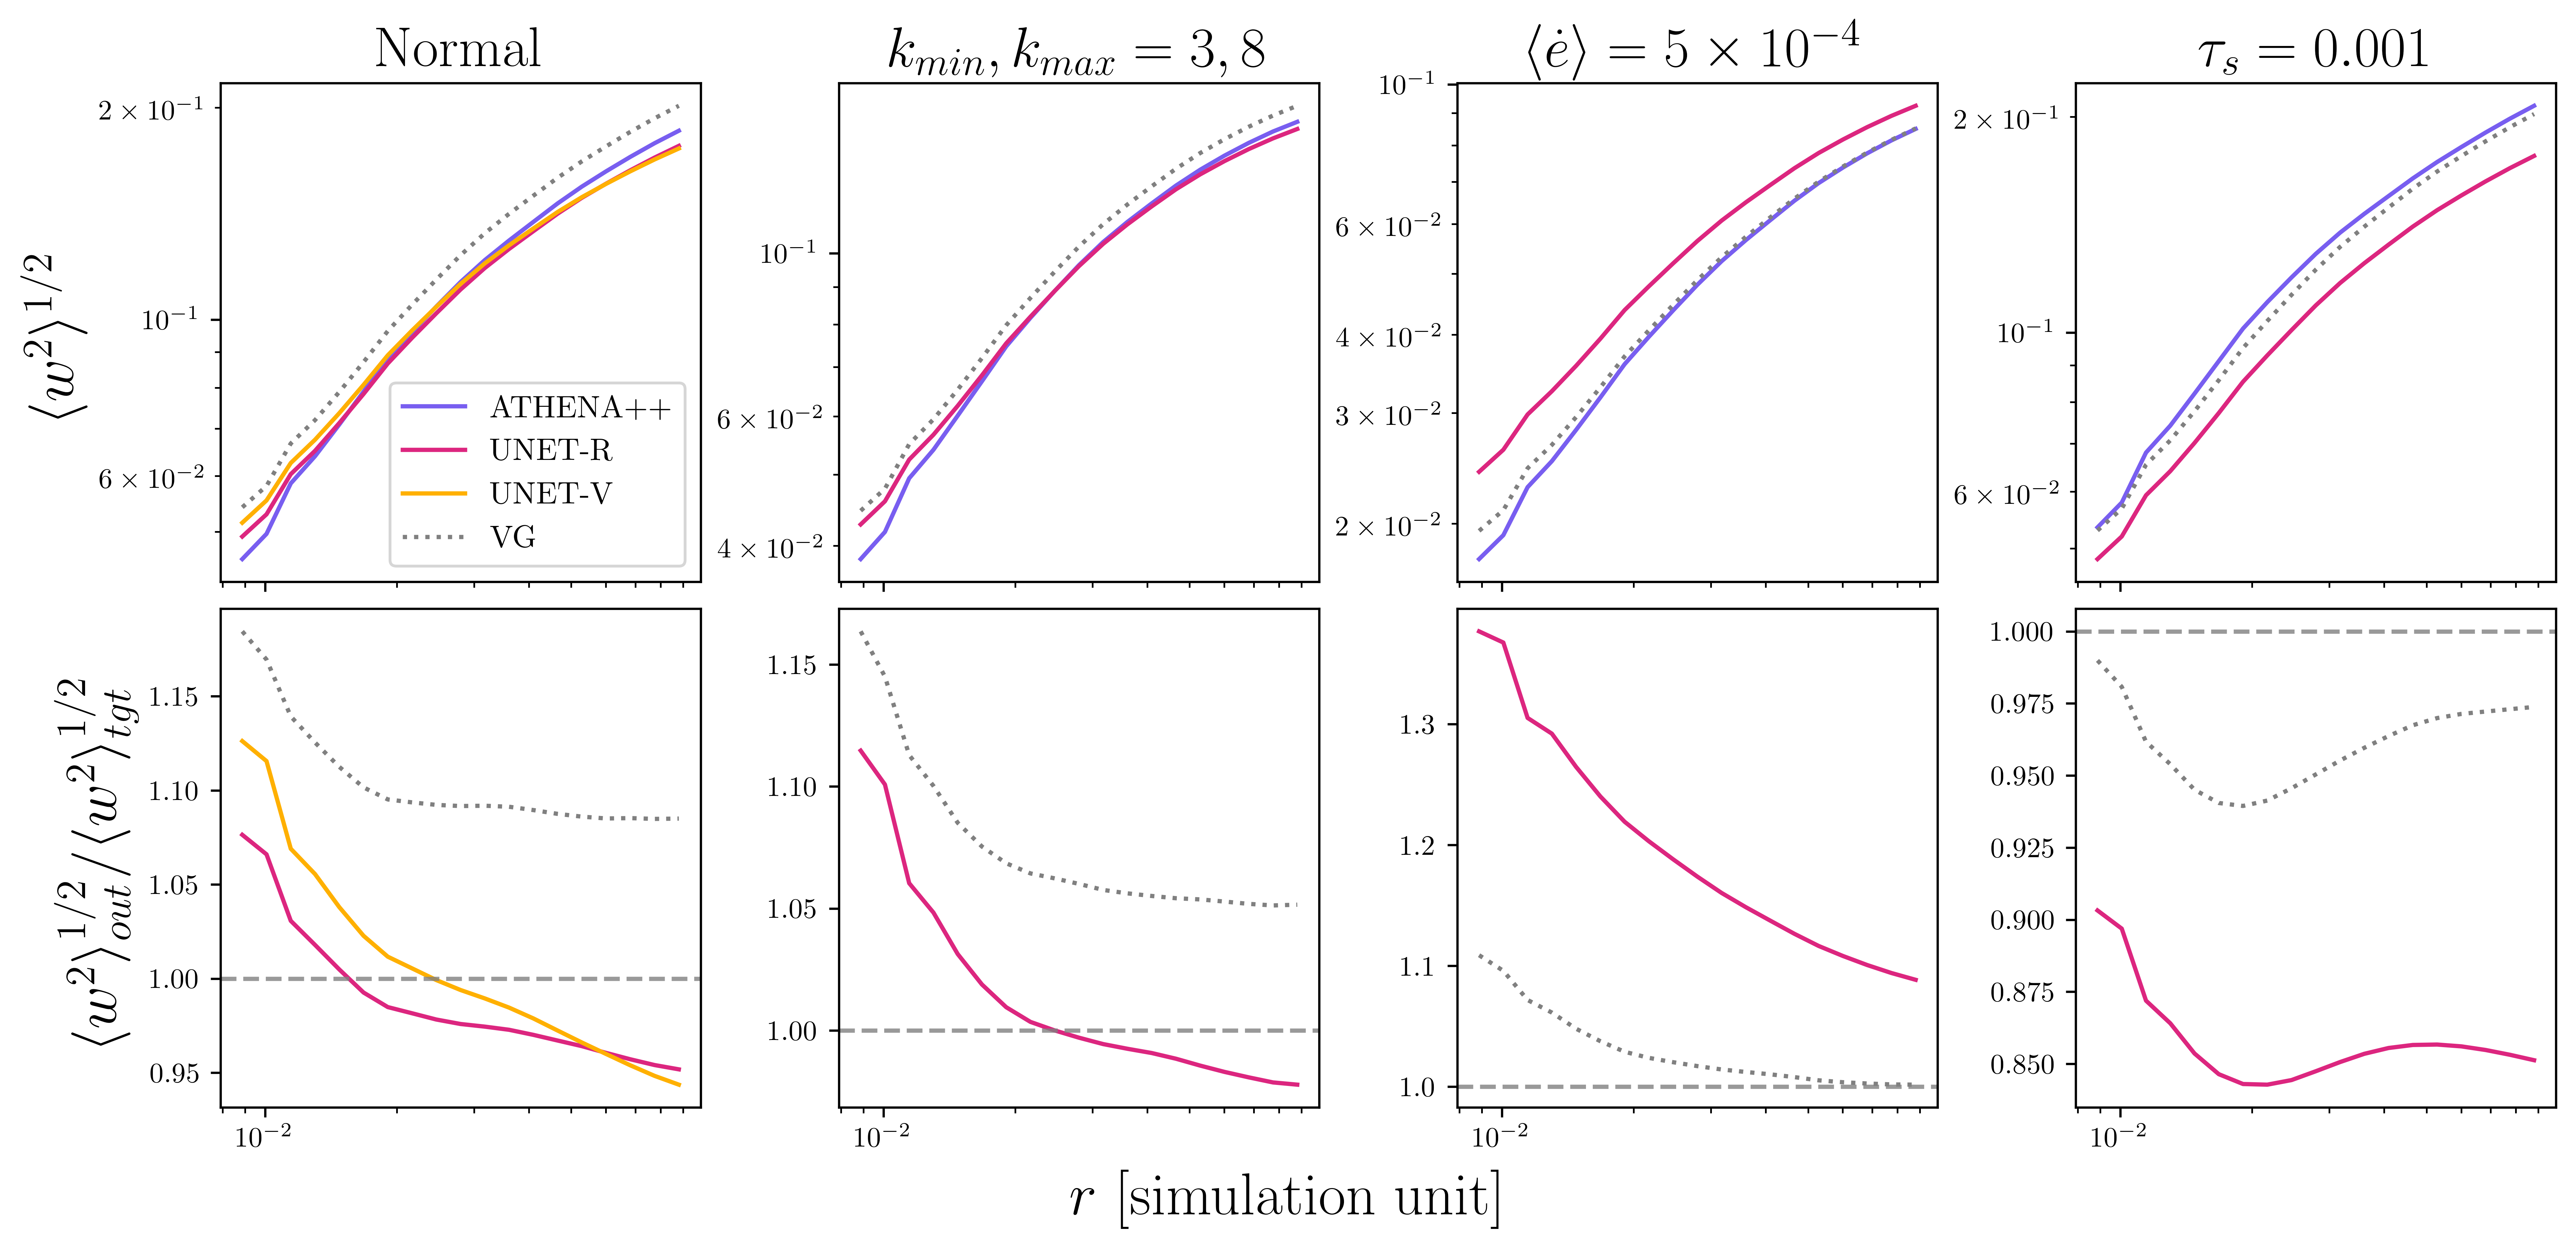

In [124]:
 with PdfPages('vrel_compare_all.pdf') as pp:
    fig, axs = plt.subplots(**plot_spec)


    # Plot all the targets
    for i, (tgt_key, meta) in enumerate(tgt_vrel.items()):
        axs[0][i].plot(meta['data']['binCenters'],np.sqrt(meta['data']['velc_sum']),
                       label=meta['label'],color=meta['color'])

    # Plot all outputs
    for out_key, meta in out_vrel.items():
        axs[0][meta['plot']].plot(meta['data']['binCenters'],np.sqrt(meta['data']['velc_sum']),
                                  label=meta['label'],color=meta['color'],ls=meta['ls'])
        #axs[0][meta['plot']].legend()

    # Plot all ratios
    for out_keys, meta in out_vrel.items():
        tgt = tgt_vrel[meta['tgt']]
        axs[1][meta['plot']].plot(meta['data']['binCenters'],
                                  np.sqrt(meta['data']['velc_sum']/tgt['data']['velc_sum']),
                                  label='{}/{}'.format(meta['label'],tgt['label']),
                                  color=meta['color'],ls=meta['ls']
                                 )
        #axs[1][meta['plot']].legend()

    """# Zoom-in plot
    axin1 = axs[1][3].inset_axes([0.18, 0.15, 0.3, 0.3])
    axin1.plot(meta['data']['binCenters'],meta['data']['RDF']/tgt['data']['RDF'],color=meta['color'])#,label=meta['label'])
    axin1.set_xlim(1/256,3e-2)
    axin1.set_ylim(1.75,2.5)
    axin1.set_xscale('log')
    axin1.set_xticks([0.4e-2,3e-2])
    axin1.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
    #zoom_line1 = Line2D([0.18,1],[0.15,0.15+1])
    #axs[1][3].add_line(zoom_line1)
    #axs[1][3].indicate_inset_zoom(axin1, edgecolor="grey")"""

    # Plotting configurations for row 0
    for i,ax in enumerate(axs[0]):
        ax.set_yscale('log')
        ax.set_xscale('log')
        #ax.axhline(1,ls='--',color='grey',alpha=0.8)
        if i == 0:
            ax.legend(fontsize=11)

    for i,ax in enumerate(axs[1]):
        ax.axhline(1,ls='--',color='grey',alpha=0.8)
        #ax.set_ylim(0.85,1.15)
        if i == 0:
            pass
            #ax.legend()
    for title_key, meta in title_dict.items():
        axs[0][meta['plot']].set_title(meta['title'],fontsize=20)

    fig.supxlabel(r'$r$ [simulation unit]',fontsize=21)
    axs[0][0].set_ylabel(r'$\langle w^2\rangle^{1/2}$',fontsize=21)
    axs[1][0].set_ylabel(r'$\langle w^2\rangle^{1/2}_{out}/\langle w^2\rangle^{1/2}_{tgt}$',fontsize=21)
    #axs[0][1].set_title('')
    pp.savefig()

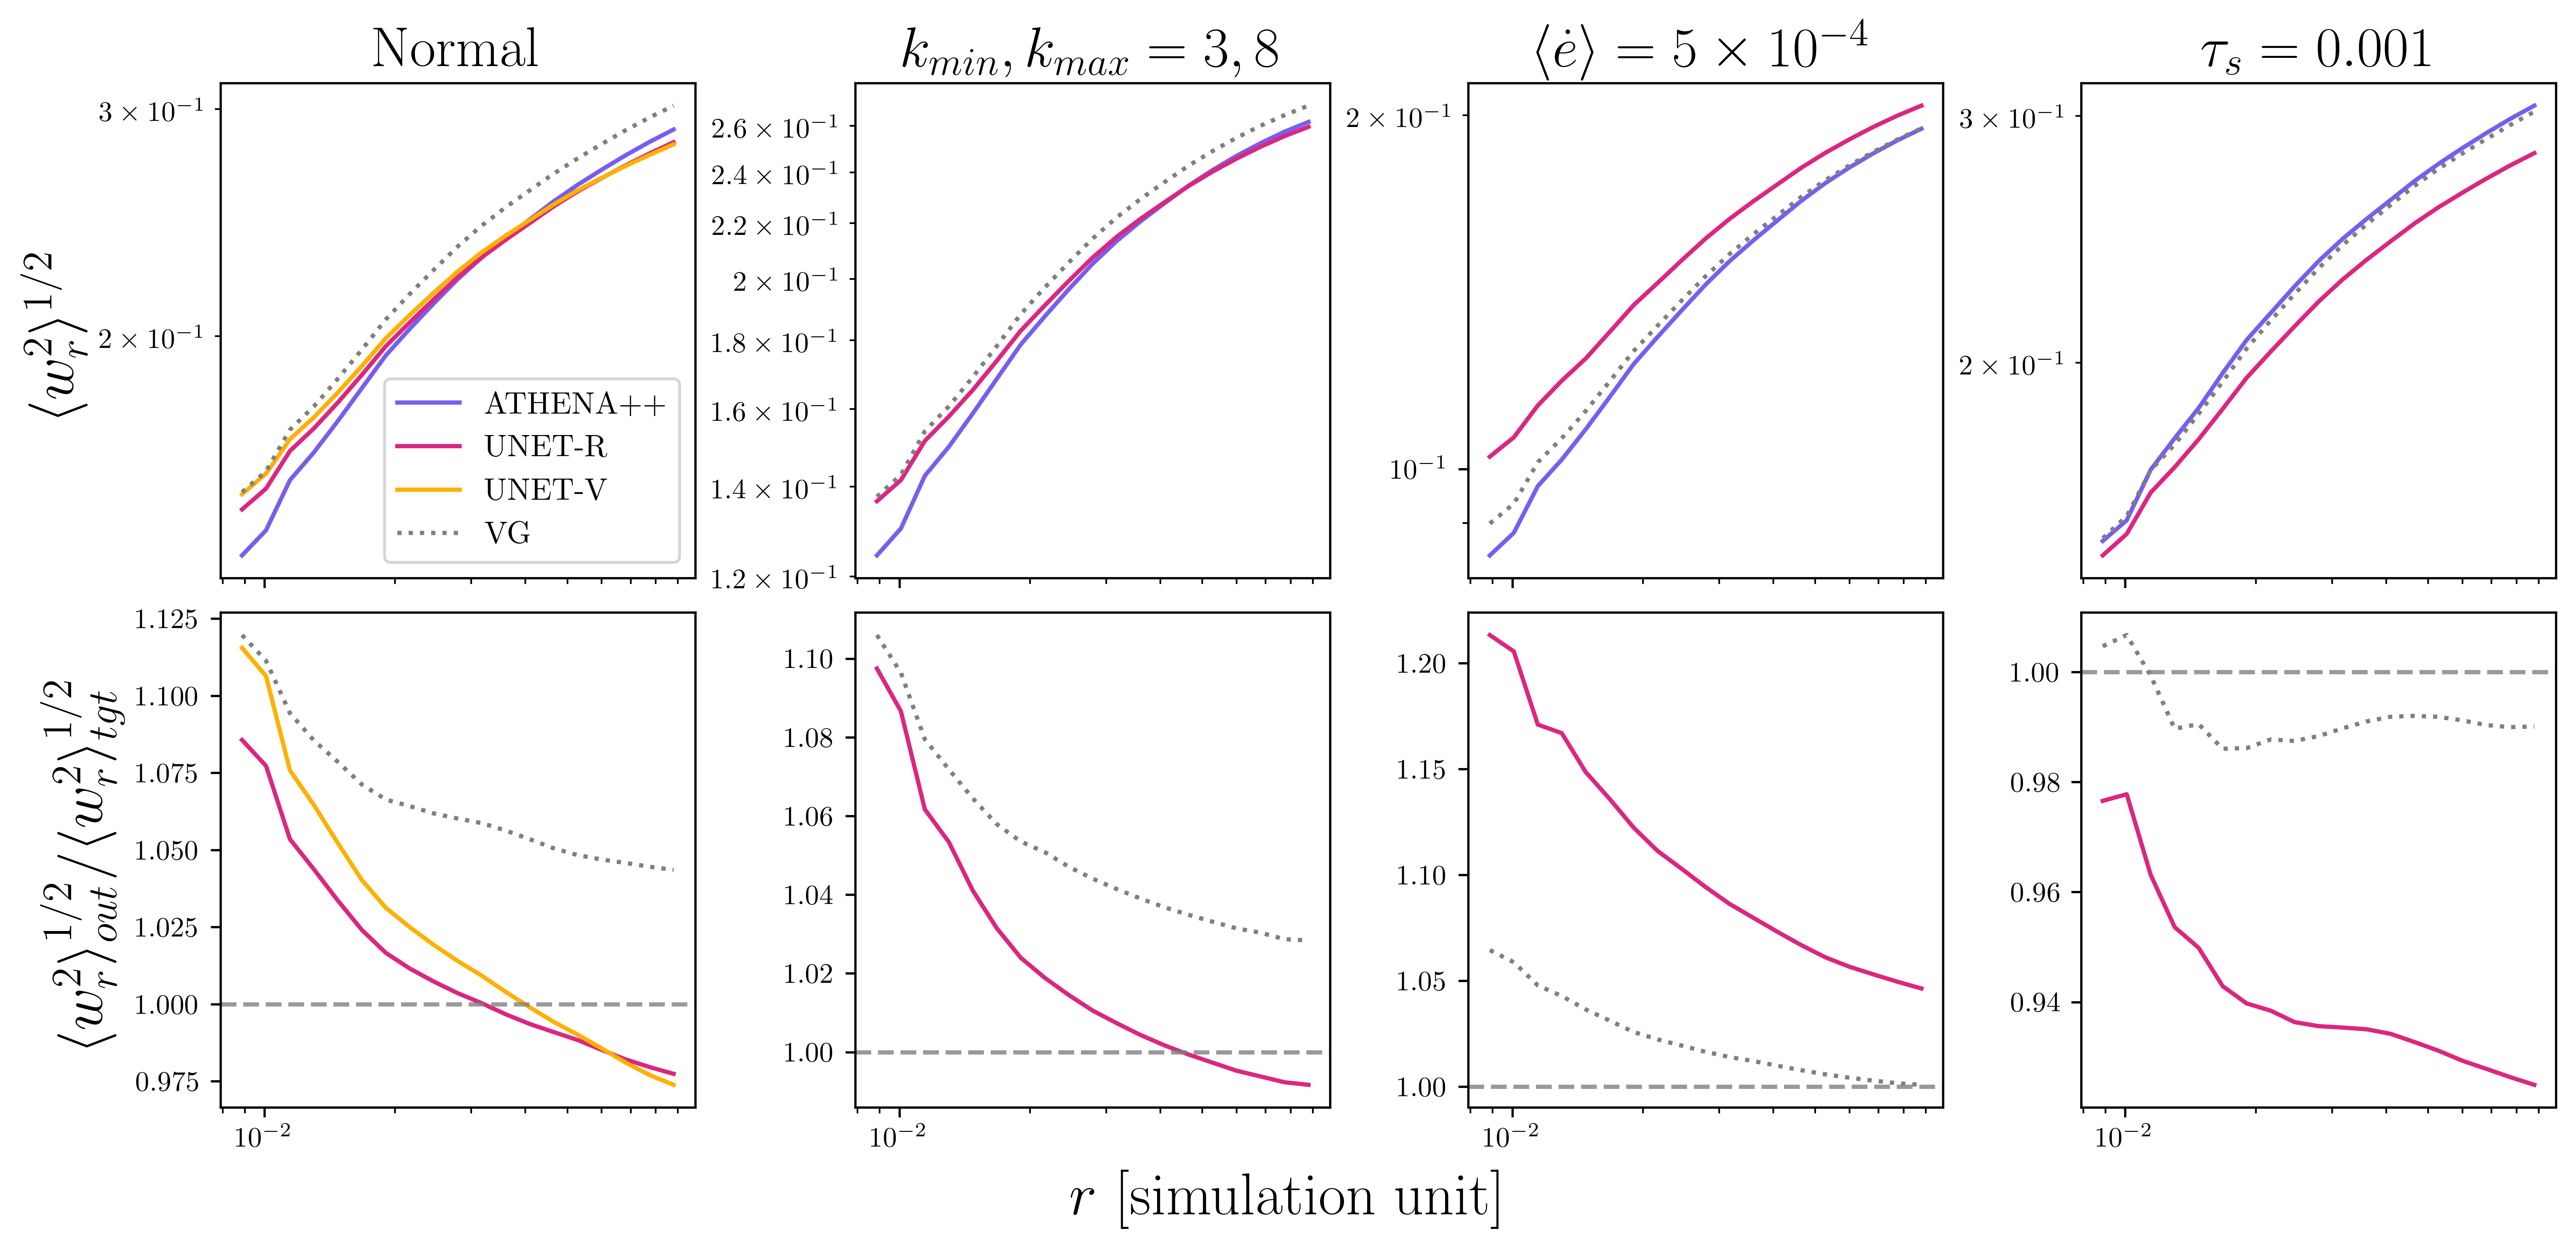

In [129]:
 with PdfPages('vrel_rad_compare_all.pdf') as pp:
    fig, axs = plt.subplots(**plot_spec)


    # Plot all the targets
    for i, (tgt_key, meta) in enumerate(tgt_vrel.items()):
        axs[0][i].plot(meta['data']['binCenters'],np.sqrt(meta['data']['velc_rad_sum']),
                       label=meta['label'],color=meta['color'])

    # Plot all outputs
    for out_key, meta in out_vrel.items():
        axs[0][meta['plot']].plot(meta['data']['binCenters'],np.sqrt(meta['data']['velc_rad_sum']),
                                  label=meta['label'],color=meta['color'],ls=meta['ls'])
        #axs[0][meta['plot']].legend()

    # Plot all ratios
    for out_keys, meta in out_vrel.items():
        tgt = tgt_vrel[meta['tgt']]
        axs[1][meta['plot']].plot(meta['data']['binCenters'],
                                  np.sqrt(meta['data']['velc_rad_sum']/tgt['data']['velc_rad_sum']),
                                  label='{}/{}'.format(meta['label'],tgt['label']),
                                  color=meta['color'],ls=meta['ls']
                                 )
        #axs[1][meta['plot']].legend()

    """# Zoom-in plot
    axin1 = axs[1][3].inset_axes([0.18, 0.15, 0.3, 0.3])
    axin1.plot(meta['data']['binCenters'],meta['data']['RDF']/tgt['data']['RDF'],color=meta['color'])#,label=meta['label'])
    axin1.set_xlim(1/256,3e-2)
    axin1.set_ylim(1.75,2.5)
    axin1.set_xscale('log')
    axin1.set_xticks([0.4e-2,3e-2])
    axin1.get_xaxis().set_minor_formatter(matplotlib.ticker.NullFormatter())
    #zoom_line1 = Line2D([0.18,1],[0.15,0.15+1])
    #axs[1][3].add_line(zoom_line1)
    #axs[1][3].indicate_inset_zoom(axin1, edgecolor="grey")"""

    # Plotting configurations for row 0
    for i,ax in enumerate(axs[0]):
        ax.set_yscale('log')
        ax.set_xscale('log')
        #ax.axhline(1,ls='--',color='grey',alpha=0.8)
        if i == 0:
            ax.legend(fontsize=11)

    for i,ax in enumerate(axs[1]):
        ax.axhline(1,ls='--',color='grey',alpha=0.8)
        #ax.set_ylim(0.85,1.15)
        if i == 0:
            pass
            #ax.legend()
    for title_key, meta in title_dict.items():
        axs[0][meta['plot']].set_title(meta['title'],fontsize=20)

    fig.supxlabel(r'$r$ [simulation unit]',fontsize=21)
    axs[0][0].set_ylabel(r'$\langle w^2_r\rangle^{1/2}$',fontsize=21)
    axs[1][0].set_ylabel(r'$\langle w^2_r\rangle^{1/2}_{out}/\langle w^2_r\rangle^{1/2}_{tgt}$',fontsize=21)
    pp.savefig()
#axs[0][1].set_title('')
